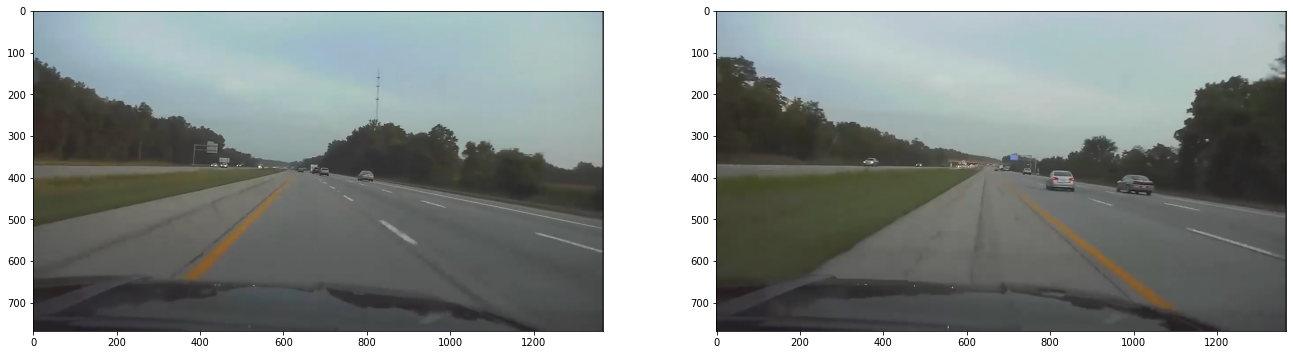

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('7.jpeg')
image2 = cv2.imread('8.jpeg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(1,2,1),plt.imshow(image)
plt.subplot(1,2,2),plt.imshow(image2)
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)


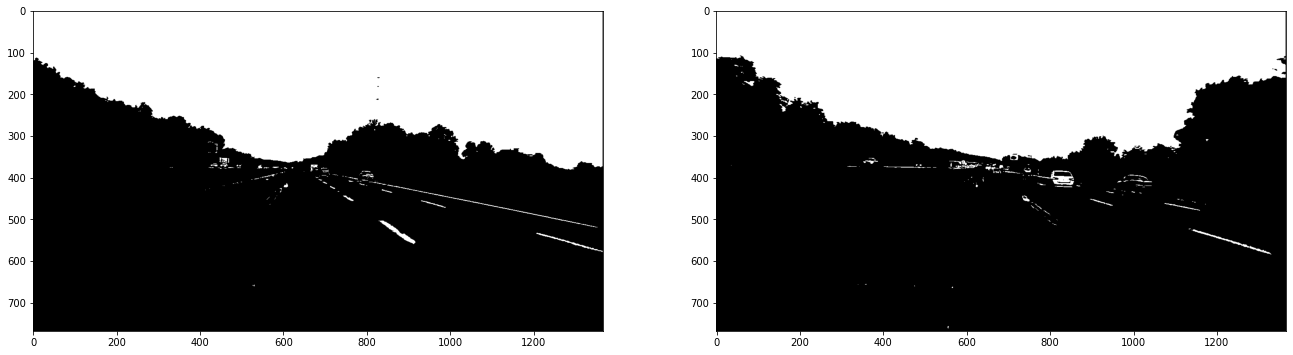

In [2]:
lane_image = np.copy(image)
lane_image2 = np.copy(image2)

image_hsv = cv2.cvtColor(lane_image, cv2.COLOR_RGB2HSV)
image_hsv2 = cv2.cvtColor(lane_image2, cv2.COLOR_RGB2HSV)

#Blanco
lowerBound= (0,0,130)
upperBound= (255,80,255)

white= cv2.inRange(image_hsv, lowerBound, upperBound)
white2= cv2.inRange(image_hsv2, lowerBound, upperBound)

plt.figure(2)
plt.subplot(1,2,1),plt.imshow(white, 'gray')
plt.subplot(1,2,2),plt.imshow(white2, 'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

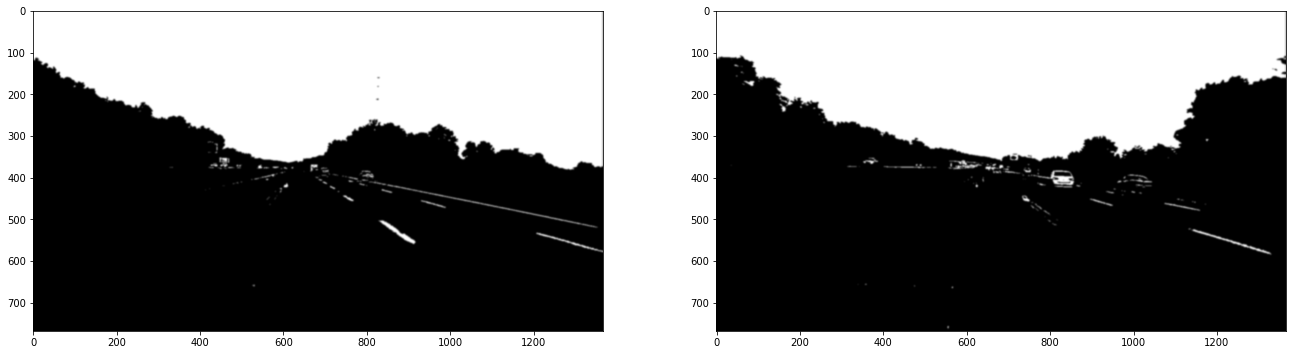

In [3]:
n=9
blur = cv2.GaussianBlur(white, (n,n), 0)            
blur2 = cv2.GaussianBlur(white2, (n,n), 0)

plt.figure(3)
plt.subplot(1,2,1),plt.imshow(blur,'gray')
plt.subplot(1,2,2),plt.imshow(blur2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

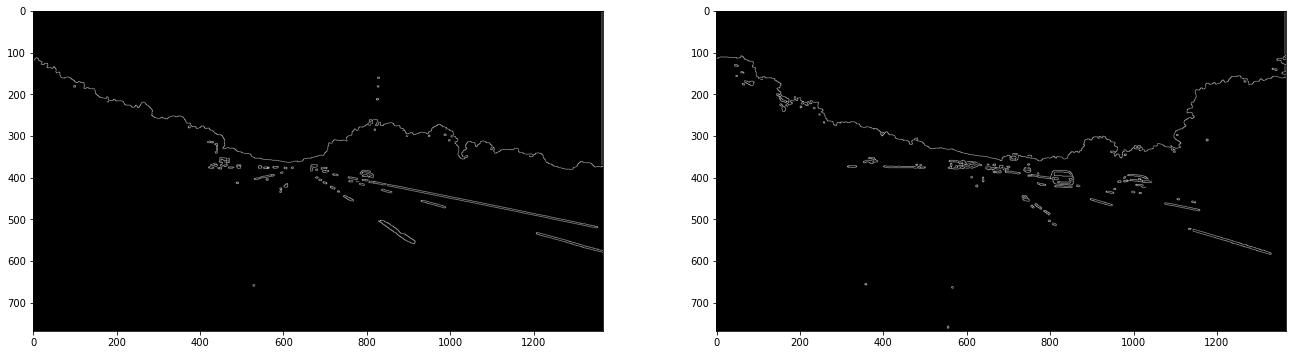

In [4]:
canny = cv2.Canny(blur, 80, 160)
canny2 = cv2.Canny(blur2, 80, 160)

plt.figure(4)
plt.subplot(1,2,1),plt.imshow(canny,'gray')
plt.subplot(1,2,2),plt.imshow(canny2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

768
768


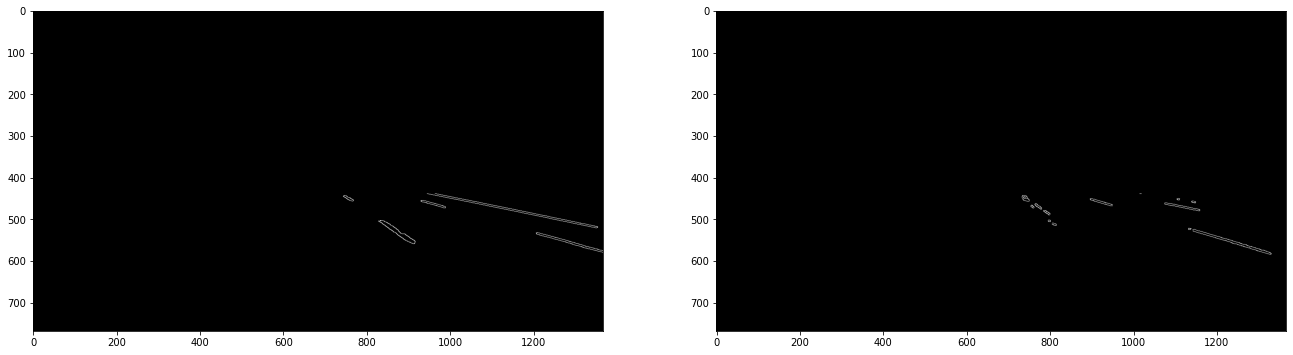

In [5]:
def region_of_interest(image):
    height = image.shape[0]
    length = image.shape[1]
    print(height)
    inf = round((4/7)*height)
    sup = round((4/5)*height)
    polygons = np.array([
        [(0,inf),(length,inf),(length,sup),(0,sup)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

cropped_image = region_of_interest(canny);
cropped_image2 = region_of_interest(canny2);

plt.figure(4)
plt.subplot(1,2,1),plt.imshow(cropped_image,'gray')
plt.subplot(1,2,2),plt.imshow(cropped_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

<class 'numpy.ndarray'>


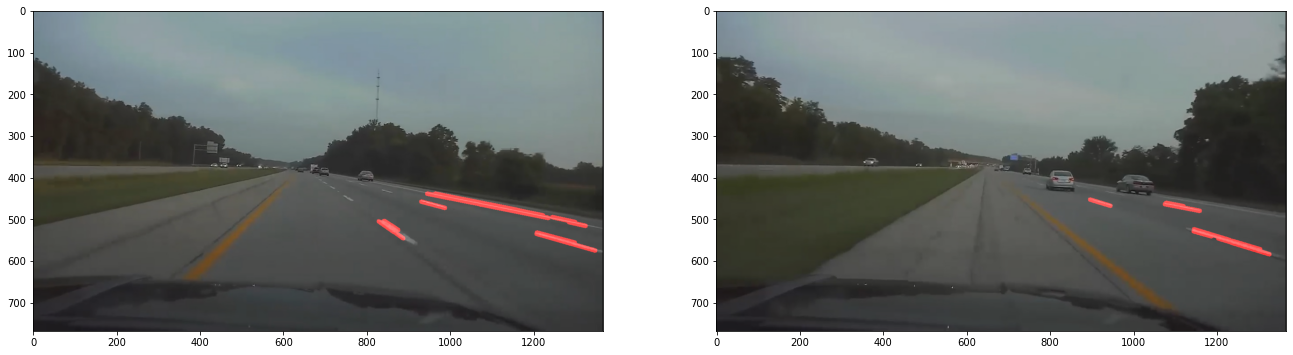

In [6]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    angle = 10
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                cv2.line(line_image, (x1, y1), (x2, y2), (255,0,0), 10)
    return line_image

    
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)
print(type(lines))
lines2 = cv2.HoughLinesP(cropped_image2, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)
line_image = display_lines(lane_image, lines)
line_image2 = display_lines(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

                 line  1
[[ 963  439 1161  478]]
0.19696969696969696
249
1853 614 965 439
                 line  2
[[1069  464 1235  497]]
0.19879518072289157
251
1826 614 946 439
                 line  3
[[1206  535 1347  575]]
0.28368794326241137
192
1488 614 871 439
                 line  4
[[1207  532 1298  556]]
0.26373626373626374
213
1520 614 857 439
                 line  5
[[ 944  439 1102  470]]
0.1962025316455696
253
1840 614 948 439
                 line  6
[[1134  473 1222  491]]
0.20454545454545456
241
1824 614 968 439
                 line  7
[[828 505 865 531]]
0.7027027027027027
-76
982 614 733 439
                 line  8
[[841 504 875 526]]
0.6470588235294118
-40
1011 614 740 439
                 line  9
[[930 458 987 473]]
0.2631578947368421
213
1524 614 859 439
                 line  10
[[1284  507 1324  516]]
0.225
218
1760 614 982 439
                 line  11
[[1244  495 1299  507]]
0.21818181818181817
223
1792 614 990 439
                 line  12
[[831 506 887

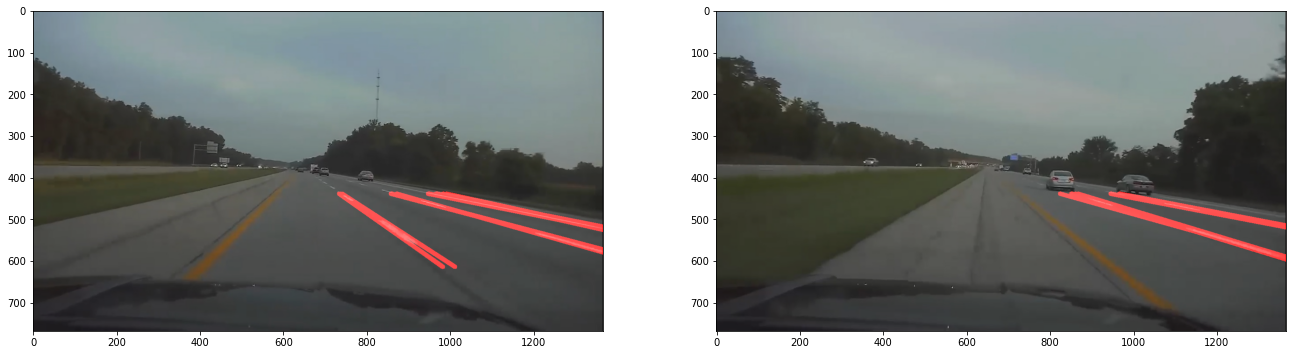

In [7]:
def display_lines_large(image, lines):
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                n = n+1
                print("                 line ",n)
                print(line)
                slope = ((y2-y1)/(x2-x1))
                print(slope)
                intercept = int(y1-slope*x1)
                print(intercept)
                y1_new = round((4/5)*height)
                y2_new = round((4/7)*height)
                if(slope==0):
                    x1_new = x1
                    x2_new = x2
                else:
                    x1_new = round((y1_new-intercept)/slope)
                    x2_new = round((y2_new-intercept)/slope)
                print(x1_new, y1_new, x2_new, y2_new)    
                cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), (255,0,0), 10)
    return line_image

line_image = display_lines_large(lane_image, lines)
line_image2 = display_lines_large(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

length  12
line
(0.19696969696969696, 249)
new_line
(0.19696969696969696, 249)
limits
0.13787878787878788 0.25606060606060604 174.3 323.7
si
line
(0.19879518072289157, 251)
new_line
(0.19696969696969696, 249.0)
limits
0.13787878787878788 0.25606060606060604 174.3 323.7
si
line
(0.28368794326241137, 192)
new_line
(0.19788243884629425, 250.0)
limits
0.13851770719240597 0.25724717050018253 175.0 325.0
no
line
(0.26373626373626374, 213)
new_line
(0.19788243884629425, 250.0)
limits
0.13851770719240597 0.25724717050018253 175.0 325.0
no
new_line
(0.28368794326241137, 192)
limits
0.19858156028368795 0.3687943262411348 134.4 249.6
si
line
(0.1962025316455696, 253)
new_line
(0.19788243884629425, 250.0)
limits
0.13851770719240597 0.25724717050018253 175.0 325.0
si
line
(0.20454545454545456, 241)
new_line
(0.19704248524593193, 251.5)
limits
0.13792973967215236 0.2561552308197115 176.05 326.95
si
line
(0.7027027027027027, -76)
new_line
(0.20079396989569326, 246.25)
limits
0.1405557789269853 0.2610

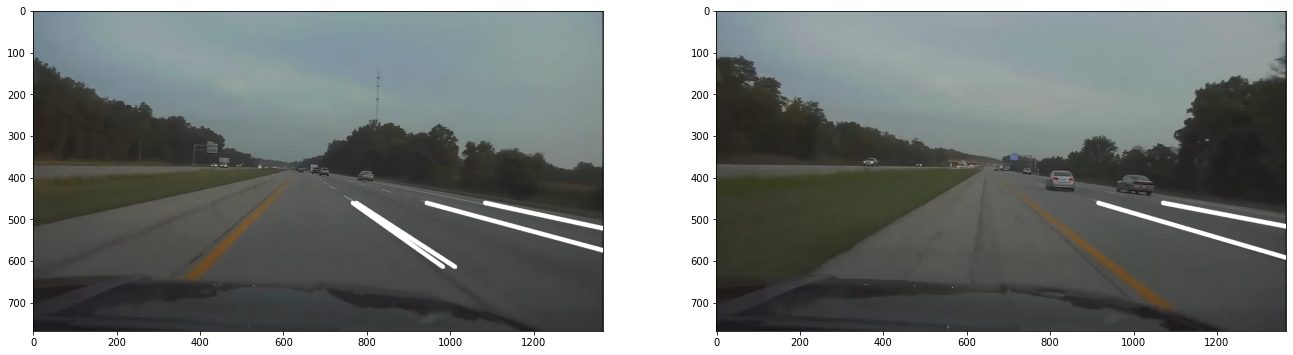

In [11]:
def display_lines_prom(image, lines):
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    param = []
    new_lines = []
    slope_error = 30
    intercept_error = 30
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                slope = ((y2-y1)/(x2-x1))
                intercept = int(y1-slope*x1)
                param.append((slope,intercept))
    print("length ", len(param))
    if len(param) is not 0:
        new_lines.append(param[0])
        for line in param:
            print("line")
            print(line)
            slope = line[0]
            intercept = line[1]
            new_lines2 = new_lines
            i=0
            for new_line in new_lines2:
                print("new_line")
                print(new_line)
                max_slope = new_line[0]+abs(new_line[0])*slope_error/100
                min_slope = new_line[0]-abs(new_line[0])*slope_error/100
                max_intercept = new_line[1]+abs(new_line[1])*intercept_error/100
                min_intercept = new_line[1]-abs(new_line[1])*intercept_error/100
                print("limits")
                print(min_slope, max_slope, min_intercept, max_intercept)
                if ((slope<max_slope)&(slope>min_slope)&(intercept<max_intercept)&(intercept>min_intercept)):
                    print("si")
                    found = True
                    new_slope = (slope+new_line[0])/2
                    new_intercept = (intercept+new_line[1])/2
                    new_line = (new_slope, new_intercept)
                    new_lines[i]=new_line
                    break
                else:
                    print("no")
                    found = False
                i=i+1
            if not found:
                new_lines.append(line)
                
    print("new_lines")
    print(new_lines)
    for line in new_lines:
        slope = line[0]
        intercept = line[1]
        y1_new = round((4/5)*height)
        y2_new = round((3/5)*height) 
        x1_new = round((y1_new-intercept)/slope)
        x2_new = round((y2_new-intercept)/slope)        
        cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), (255,255,255), 10)
    return line_image

line_image = display_lines_prom(lane_image, lines)
print("______________________________________________________")
line_image2 = display_lines_prom(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

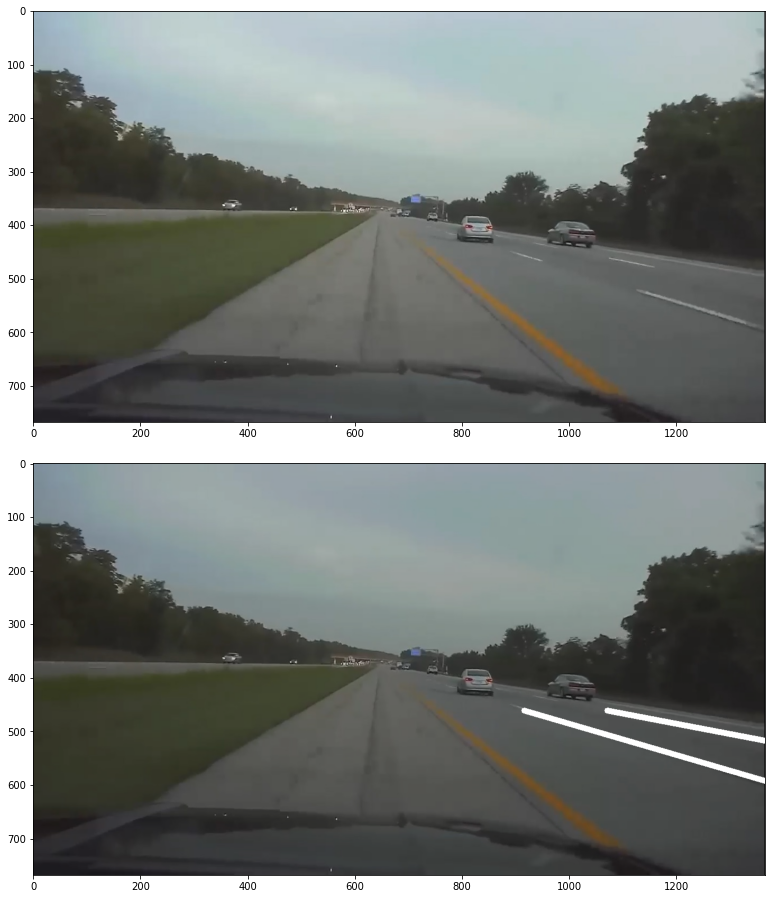

In [9]:
plt.figure(6)
plt.subplot(2,1,1),plt.imshow(image2)
plt.subplot(2,1,2),plt.imshow(mixed_image2)
plt.subplots_adjust(top=4, bottom=1, left=1, right=5, hspace=0.1, wspace=0.2)

Próximo por hacer
* Probar con las imágenes del video
* Intentar hacer el filtro de color como en el de la primera entrega para las líneas amarillas
* Pasarlo a hacer con video